In [73]:
import time, json, requests
import pandas as pd
import datetime

# 每日疫情数据

In [2]:
#download data
def downloadDailyData():
    url = 'https://view.inews.qq.com/g2/getOnsInfo?name=disease_h5&callback=&_=%d'%int(time.time()*1000)
    data = json.loads(requests.get(url=url).json()['data'])
    return data

In [176]:
# decode area data to data frame
def getAreaDataFrame(response_data):
    area_tree = response_data['areaTree']
    df_area = pd.DataFrame(columns=['Country','Province','City','AllOrToday','confirm','suspect','dead','heal'])
    for country in area_tree:
        df_area = df_area.append({'Country':country['name'],
                   'Province':'',
                   'City':'',               
                   'AllOrToday':'All',
                   'confirm':country['total']['confirm'],
                   'suspect':country['total']['suspect'],
                   'dead':country['total']['dead'],
                   'heal':country['total']['heal']
                  },ignore_index=True)
        if(country['today']['isUpdated'] == True):
            df_area = df_area.append({'Country':country['name'],
                       'Province':'',
                       'City':'',               
                       'AllOrToday':'Today',
                       'confirm':country['today']['confirm'],
                       'suspect':country['today']['suspect'],
                       'dead':country['today']['dead'],
                       'heal':country['today']['heal']
                      },ignore_index=True)
        if 'children' in country:
            country_tree = country['children']
            for province in country_tree:
                #print('pv:{}'.format(province['name']))
                df_area = df_area.append({'Country':country['name'],
                   'Province':province['name'],
                   'City':'',               
                   'AllOrToday':'All',
                   'confirm':province['total']['confirm'],
                   'suspect':province['total']['suspect'],
                   'dead':province['total']['dead'],
                   'heal':province['total']['heal']
                  },ignore_index=True)
                if(province['today']['isUpdated'] == True):
                    df_area = df_area.append({'Country':country['name'],
                       'Province':province['name'],
                       'City':'',               
                       'AllOrToday':'Today',
                       'confirm':province['today']['confirm'],
                       'suspect':province['today']['suspect'],
                       'dead':province['today']['dead'],
                       'heal':province['today']['heal']
                      },ignore_index=True)
                if 'children' in province:
                    province_tree = province['children']
                    for city in province_tree:
                        df_area = df_area.append({'Country':country['name'],
                           'Province':province['name'],
                           'City':city['name'],               
                           'AllOrToday':'All',
                           'confirm':city['total']['confirm'],
                           'suspect':city['total']['suspect'],
                           'dead':city['total']['dead'],
                           'heal':city['total']['heal']
                          },ignore_index=True)
                        if(city['today']['isUpdated'] == True):
                            df_area = df_area.append({'Country':country['name'],
                               'Province':province['name'],
                               'City':city['name'],               
                               'AllOrToday':'Today',
                               'confirm':city['today']['confirm'],
                               'suspect':city['today']['suspect'],
                               'dead':city['today']['dead'],
                               'heal':city['today']['heal']
                              },ignore_index=True)
    return df_area

In [177]:
def chinaSummary(data):
    data['chinaTotal']['AllOrToday'] = 'All'
    data['chinaAdd']['AllOrToday'] = 'Today'
    china_summary = pd.DataFrame.from_records([data['chinaTotal'],data['chinaAdd']])
    return china_summary

In [178]:
def getHistory(data):
    china_history_sum = pd.DataFrame.from_records(data['chinaDayList'])
    china_history_add = pd.DataFrame.from_records(data['chinaDayAddList'])
    return china_history_sum, china_history_add

In [179]:
def saveAll(data):
    last_time = data['lastUpdateTime'].replace(':','-')
    print(last_time)
    area_df = getAreaDataFrame(data)
    area_df.to_csv('data/infections/area_{}.csv'.format(last_time),index=False)
    summary = chinaSummary(data)
    summary.to_csv('data/infections/summary_{}.csv'.format(last_time),index=False)
    history_sum,history_add = getHistory(data)
    history_sum.to_csv('data/infections/history_sum_{}.csv'.format(last_time),index=False)
    history_add.to_csv('data/infections/history_add_{}.csv'.format(last_time),index=False)

In [180]:
# Run this function daily to save data
def updateNow():
    data = downloadDailyData()
    saveAll(data)
    return data

In [328]:
data = updateNow()

2020-02-09 00-43-23


In [329]:
df_area = getAreaDataFrame(data)

# 数据查询

In [330]:
#今日概览
chinaSummary(data)

,confirm,suspect,dead,heal,AllOrToday
0,34677,27657,724,2374,All
1,79,0,1,322,Today


In [331]:
#全球数据： 
df_area[(df_area['Province']=='') & (df_area['AllOrToday']=='All')]

,Country,Province,City,AllOrToday,confirm,suspect,dead,heal
0,中国,,,All,34677,27657,724,2374
464,日本,,,All,89,0,0,1
465,新加坡,,,All,40,0,0,2
466,泰国,,,All,32,0,0,8
467,韩国,,,All,24,0,0,2
468,马来西亚,,,All,16,0,0,2
469,澳大利亚,,,All,15,0,0,5
470,越南,,,All,13,0,0,3
471,德国,,,All,13,0,0,0
472,美国,,,All,12,0,0,1


In [332]:
#全国数据： 
df_area[(df_area['Country']=='中国')& (df_area['City']=='') & (df_area['AllOrToday']=='All')]

,Country,Province,City,AllOrToday,confirm,suspect,dead,heal
0,中国,,,All,34677,27657,724,2374
2,中国,湖北,,All,24953,0,699,1217
21,中国,广东,,All,1095,0,1,116
43,中国,浙江,,All,1048,0,0,174
56,中国,河南,,All,981,0,4,116
76,中国,湖南,,All,803,0,1,155
91,中国,安徽,,All,733,0,0,59
108,中国,江西,,All,698,0,0,55
120,中国,江苏,,All,439,0,0,51
134,中国,重庆,,All,428,0,2,39


In [333]:
#各省数据： 
df_area[(df_area['Province']=='北京')& (df_area['AllOrToday']=='All')]

,Country,Province,City,AllOrToday,confirm,suspect,dead,heal
212,中国,北京,,All,315,0,2,34
213,中国,北京,朝阳,All,53,0,0,0
214,中国,北京,海淀,All,49,0,0,0
215,中国,北京,西城,All,37,0,0,0
216,中国,北京,大兴,All,34,0,0,0
217,中国,北京,丰台,All,26,0,0,0
218,中国,北京,外地来京,All,25,0,0,0
219,中国,北京,昌平,All,17,0,0,0
220,中国,北京,通州,All,15,0,0,0
221,中国,北京,房山,All,14,0,0,0


In [334]:
#新增数据： All --> Today
df_area[(df_area['AllOrToday']=='Today')]

,Country,Province,City,AllOrToday,confirm,suspect,dead,heal
1,中国,,,Today,79,0,0,0


In [335]:
#累计确诊历史
getHistory(data)[0]

,confirm,suspect,dead,heal,deadRate,healRate,date
0,41,0,1,0,2.4,0.0,01.13
1,41,0,1,0,2.4,0.0,01.14
2,41,0,2,5,4.9,12.2,01.15
3,45,0,2,8,4.4,17.8,01.16
4,62,0,2,12,3.2,19.4,01.17
5,198,0,3,17,1.5,8.6,01.18
6,275,0,4,18,1.5,6.5,01.19
7,291,54,6,25,2.1,8.6,01.20
8,440,37,9,25,2.0,5.7,01.21
9,571,393,17,25,3.0,4.4,01.22


In [336]:
#新增确诊历史
getHistory(data)[1]

,confirm,suspect,dead,heal,deadRate,healRate,date
0,77,27,0,0,0.0,0.0,01.20
1,149,53,3,0,2.0,0.0,01.21
2,131,257,8,0,6.1,0.0,01.22
3,259,680,8,6,3.1,2.3,01.23
4,444,1118,16,3,3.6,0.7,01.24
5,688,1309,15,11,2.2,1.6,01.25
6,769,3806,24,2,3.1,0.3,01.26
7,1771,2077,26,9,1.5,0.5,01.27
8,1459,3248,26,43,1.8,2.9,01.28
9,1737,4148,38,21,2.2,1.2,01.29


# 患者小区查询
一个来源：腾讯 https://ncov.html5.qq.com/community?channelid=17


In [338]:
def getCommunityDataFrame():
    getCommunity_url = 'https://ncov.html5.qq.com/api/getCommunity?'
    data = requests.get(url=getCommunity_url).json()['community']
    all_records=[]
    for province in data:
        p_data = data[province]
        for city in p_data:
            c_data = p_data[city]
            for district in c_data:        
                d_data = c_data[district]
                for record in d_data:
                    all_records.append(record)                
    df_community = pd.DataFrame.from_records(all_records) 
    return df_community
def saveCommunityData(df_community):
    localtime = datetime.datetime.now().strftime("%y-%m-%d-%H-%M-EST")
    print('update at : {}'.format(localtime))
    timestamp = datetime.datetime.now().strftime("%m-%d")
    df_community['date_saved'] = timestamp
    df_community.to_csv('data/infections/community_{}.csv'.format(timestamp),index=False)
def updateCommunity():
    df = getCommunityDataFrame()
    saveCommunityData(df)

In [339]:
updateCommunity()

update at : 20-02-08-16-00-EST


## 社区数据 in Geopandas

In [223]:
import geopandas as gpd
df = getCommunityDataFrame()
df_geo = df[['province','city','district','full_address','cnt_sum_certain','lng','lat']]
df_geo = df_geo.replace('',0).astype({'cnt_sum_certain':'int32','lng': 'float64','lat': 'float64'})
gdf = gpd.GeoDataFrame(
    df_geo, geometry=gpd.points_from_xy(df_geo.lng, df_geo.lat))
gdf

,province,city,district,full_address,cnt_sum_certain,lng,lat,geometry
0,云南省,昆明市,东川区,云南省昆明市东川区乌龙镇瓦房村黄包谷地,1,103.079323,25.975559,POINT (103.07932 25.97556)
1,云南省,昆明市,五华区,云南省昆明市五华区春晖小区,2,102.679253,25.051399,POINT (102.67925 25.05140)
2,云南省,昆明市,五华区,云南省昆明市五华区耀龙康城,1,102.730247,25.098301,POINT (102.73025 25.09830)
3,云南省,昆明市,五华区,云南省昆明市五华区新闻里小区,2,102.692291,25.034473,POINT (102.69229 25.03447)
4,云南省,昆明市,五华区,云南省昆明市五华区西景盛典小区,1,102.707370,25.043470,POINT (102.70737 25.04347)
...,...,...,...,...,...,...,...,...
3225,广西壮族自治区,南宁市,青秀区,广西壮族自治区南宁市青秀区星湖路南一里一巷18号单位住宅,-1,108.343510,22.805840,POINT (108.34351 22.80584)
3226,广西壮族自治区,南宁市,青秀区,广西壮族自治区南宁市青秀区津头街道教育路7号,-1,108.338210,22.802720,POINT (108.33821 22.80272)
3227,广西壮族自治区,南宁市,青秀区,广西壮族自治区南宁市青秀区竹溪大道73号领东尚层,-1,108.373750,22.806080,POINT (108.37375 22.80608)
3228,广西壮族自治区,南宁市,青秀区,广西壮族自治区南宁市青秀区长湖路15号中鼎温馨家园,-1,108.366360,22.826760,POINT (108.36636 22.82676)


In [224]:
df_geo

,province,city,district,full_address,cnt_sum_certain,lng,lat,geometry
0,云南省,昆明市,东川区,云南省昆明市东川区乌龙镇瓦房村黄包谷地,1,103.079323,25.975559,POINT (103.07932 25.97556)
1,云南省,昆明市,五华区,云南省昆明市五华区春晖小区,2,102.679253,25.051399,POINT (102.67925 25.05140)
2,云南省,昆明市,五华区,云南省昆明市五华区耀龙康城,1,102.730247,25.098301,POINT (102.73025 25.09830)
3,云南省,昆明市,五华区,云南省昆明市五华区新闻里小区,2,102.692291,25.034473,POINT (102.69229 25.03447)
4,云南省,昆明市,五华区,云南省昆明市五华区西景盛典小区,1,102.707370,25.043470,POINT (102.70737 25.04347)
...,...,...,...,...,...,...,...,...
3225,广西壮族自治区,南宁市,青秀区,广西壮族自治区南宁市青秀区星湖路南一里一巷18号单位住宅,-1,108.343510,22.805840,POINT (108.34351 22.80584)
3226,广西壮族自治区,南宁市,青秀区,广西壮族自治区南宁市青秀区津头街道教育路7号,-1,108.338210,22.802720,POINT (108.33821 22.80272)
3227,广西壮族自治区,南宁市,青秀区,广西壮族自治区南宁市青秀区竹溪大道73号领东尚层,-1,108.373750,22.806080,POINT (108.37375 22.80608)
3228,广西壮族自治区,南宁市,青秀区,广西壮族自治区南宁市青秀区长湖路15号中鼎温馨家园,-1,108.366360,22.826760,POINT (108.36636 22.82676)


In [225]:
df_geo['province']=='湖北省'

0       False
1       False
2       False
3       False
4       False
        ...  
3225    False
3226    False
3227    False
3228    False
3229    False
Name: province, Length: 3230, dtype: bool

In [227]:
m_gdf = gdf.loc[gdf['province']=='北京市']


In [228]:
m_gdf.crs = {'init' :'epsg:4326'}

In [229]:
m_gdf.crs

{'init': 'epsg:4326'}

In [230]:
m_gdf = m_gdf.to_crs(epsg=3857)

## 位置图预览

In [147]:
import contextily as ctx

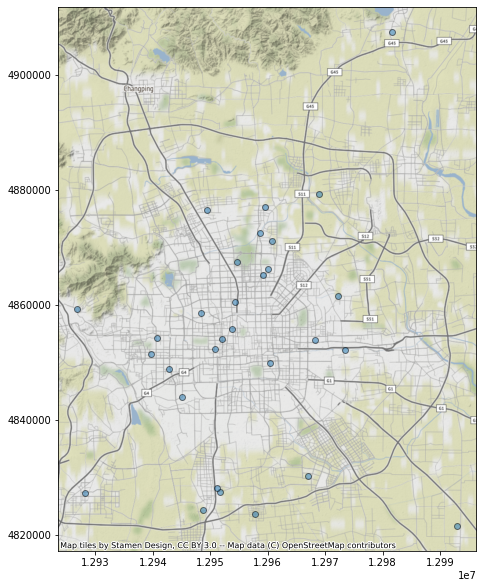

In [239]:
ax = m_gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

In [240]:
fig = ax.get_figure()
fig.savefig('./data/infections/community-beijing-{}.png'.format(timestamp))

## 社区位置增长预览

In [251]:
compare_paths = ['./data/infections/community_20-02-06-13-13-EST.csv',
                 './data/infections/community_20-02-07-16-26-EST.csv']
frames = [ pd.read_csv(f) for f in compare_paths ]
result = pd.concat(frames)
result

In [321]:
target_province = '北京市'
target_city = '' #leave empty if for full province

In [322]:
target_all = result.loc[(result['province']==target_province) & (result['city'].str.contains(target_city))]

In [323]:
target_count = result.loc[(result['province']==target_province) & (result['city']==target_city)].groupby('full_address').count()['date_saved']

In [324]:
m_df = target_all.join(target_count,on='full_address',rsuffix='_c')

In [325]:
m_df = m_df.replace('',0).astype({'cnt_sum_certain':'int32','lng': 'float64','lat': 'float64'})
m_gdf = gpd.GeoDataFrame(
    m_df, geometry=gpd.points_from_xy(m_df.lng, m_df.lat))

m_gdf.crs = {'init' :'epsg:4326'}
m_gdf = m_gdf.to_crs(epsg=3857)

In [326]:
m_gdf = m_gdf.drop_duplicates(subset='full_address',keep='first')

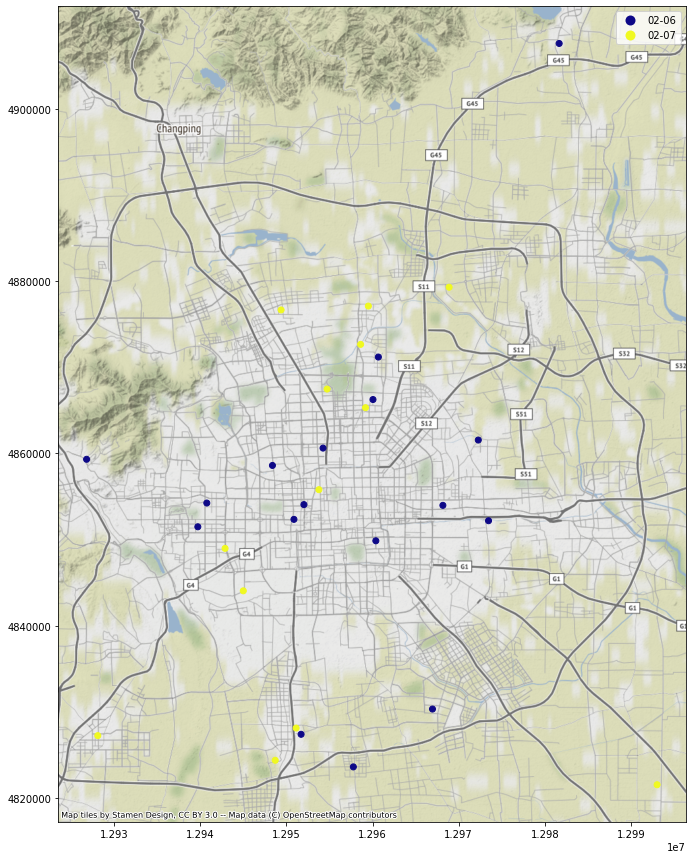

In [327]:
ax = m_gdf.plot(figsize=(20, 15), alpha=1,cmap='plasma', column='date_saved',legend= True)
ctx.add_basemap(ax)

### 保存图片

In [291]:
fig = ax.get_figure()
fig.savefig('./data/infections/community-growth-xuzhou.png')

# 患者同行数据
三个来源：搜狗/人民日报/腾讯

搜狗
https://sa.sogou.com/new-weball/page/sgs/epidemic/yyxw?type_page=yangshi&scene=2&clicktime=1580381964&enterid=1580381964&from=timeline&isappinstalled=0

In [29]:
sogou_trips = pd.read_json('https://hhyfeed.sogoucdn.com/js/common/epidemic-search/main.js')
sogou_trips.to_csv('data/trips/sogou_trips.csv')

人民日报 http://2019ncov.nosugartech.com/search.html?t_date=&t_no=&t_area=

In [30]:
url_trip = 'http://2019ncov.nosugartech.com/data.json?'
json_res = requests.get(url=url_trip).json()['data']
nosugar_trips = pd.DataFrame.from_records(json_res)
nosugar_trips.to_csv('data/trips/nosugar_trips.csv')

腾讯 https://rl.inews.qq.com/h5/trip?from=newsapp

In [87]:
tx_trip_url = 'https://rl.inews.qq.com/taf/travelFront'
json_res = requests.get(url=tx_trip_url).json()['data']['list']
tx_trips = pd.DataFrame.from_records(json_res)
tx_trips.to_csv('data/trips/tx_trips.csv')

In [27]:
tx_trips

,date,start,end,type,no,no_sub,memo,pos_start,pos_end,source,who
0,2020-02-03,,,1,MF810,,,,福州,https://m.weibo.cn/status/4469031496679960?ope...,
1,2020-02-03,,,2,G1408,13号车厢,,广州南,南昌西,https://m.weibo.cn/status/4468528998833555?ope...,湖南疾控
2,2020-02-03,,,4,湘A02906D,,,桂花村,,https://m.weibo.cn/1740557654/4468675682159071,金鹰955电台
3,2020-02-03,,,5,渭南6路,,1人确诊,火车站,第二医院,https://weibo.com/6072764925/IsOpetYEL?type=co...,渭南同城
4,2020-02-02,,,6,黑AE888Z,网约车,,南极国际小区,哈尔滨传染病院,https://mp.weixin.qq.com/s/RPfahGQ_Gg483fv3Bah4BQ,人民日报
...,...,...,...,...,...,...,...,...,...,...,...
1844,2020-01-04,,,2,K1282,6车厢,不详,深圳东,光山,http://www.huangchuan.gov.cn/xinwen/tzgg/2020B...,潢川人民政府
1845,2020-01-03,,,2,K628,8车厢,1人确诊,宜昌东,西安,https://baijiahao.baidu.com/s?id=1657495493717...,兰州新闻网
1846,2019-12-27,,,2,Z14,10号车厢,,广州东,沈阳北,http://www.zgcy.gov.cn/ZGCY/zwgk/20200131/0040...,朝阳市新型肺炎疫情防控指挥部办公室
1847,2019-12-27,,,2,Z11/Z14,10号车厢,,长沙,沈阳北,http://www.zgcy.gov.cn/ZGCY/zwgk/20200131/0040...,朝阳市新型冠状病毒感染的肺炎疫情防控指挥部办公室
